In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
# reading the data from the Training data set
df = pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Prints the information in the dataframe, about column labels, data types and memory
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# printing the various columns in the datasets
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
# printing the shape of the dataset
df.shape

(10683, 11)

In [7]:
# printing the summary statistics of the dataframe

df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
# Altering the Date_of_Journey field to use numeric data by splitting into Date, Month, and Year attributes separately
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [9]:
# Dropping the Date_of_Journey attribute as it's no longer required
df.drop('Date_of_Journey',axis=1,inplace=True)

In [10]:
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [11]:
# printing out the information, to check the updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  object
 11  Month            10683 non-null  object
 12  Year             10683 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [12]:
# changing the Date, Month, Year from object type to the int type
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [13]:
# splitting the time value alone from the Arrival_time
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x: x.split(' ')[0])

In [14]:
# checking if there are any null values
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [15]:
# splitting the arrival_time to arrival_time_hour and arrival_time_min
df['Arrial_Time_Hour'] = df['Arrival_Time'].apply(lambda x: x.split(':')[0])
df['Arrial_Time_Min'] = df['Arrival_Time'].apply(lambda x: x.split(':')[1])

In [16]:
# Dropping the Arrival_time attribute as it's no longer required
df.drop('Arrival_Time',axis=1,inplace=True)
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrial_Time_Hour,Arrial_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [17]:
# changing the Arrial_Time_Hour, Arrial_Time_Min from object type to the int type

df['Arrial_Time_Hour'] = df['Arrial_Time_Hour'].astype(int)
df['Arrial_Time_Min'] = df['Arrial_Time_Min'].astype(int)

In [18]:
# splitting the Dep_Time to Dep_Time_Hour and Dep_Time_Min

df['Dep_Time_Hour'] = df['Dep_Time'].apply(lambda x: x.split(':')[0])
df['Dep_Time_Min'] = df['Dep_Time'].apply(lambda x: x.split(':')[1])

In [19]:
# Dropping the Dep_Time attribute as it's no longer required

df.drop('Dep_Time',axis=1,inplace=True)
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrial_Time_Hour,Arrial_Time_Min,Dep_Time_Hour,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [20]:
# changing the Dep_Time_Hour,Dep_Time_Min from object type to the int type

df['Dep_Time_Hour'] = df['Dep_Time_Hour'].astype(int)
df['Dep_Time_Min'] = df['Dep_Time_Min'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Date              10683 non-null  int64 
 9   Month             10683 non-null  int64 
 10  Year              10683 non-null  int64 
 11  Arrial_Time_Hour  10683 non-null  int64 
 12  Arrial_Time_Min   10683 non-null  int64 
 13  Dep_Time_Hour     10683 non-null  int64 
 14  Dep_Time_Min      10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [22]:
# retrieving the unique values from the attribute Total_stops

df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [23]:
# replacing the Total_stops field with the numerical values

df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0,
                                                     '2 stops':2,
                                                     '1 stop':1,
                                                     '3 stops':3,
                                                     '4 stops':4})
df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrial_Time_Hour,Arrial_Time_Min,Dep_Time_Hour,Dep_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [24]:
#Checking for any null values for the Total_Stops

df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrial_Time_Hour,Arrial_Time_Min,Dep_Time_Hour,Dep_Time_Min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [25]:
# dropping the Route as it is not necessary

df.drop('Route',axis=1,inplace=True)

In [26]:
# retrieving the information of the duration in hours and minutes

df['Duration_Hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [27]:
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)

In [28]:
# changing the Duration_Hour to type int

df['Duration_Hour'] = df['Duration_Hour'].astype('int')

In [29]:
df['Duration_Min'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [30]:
df['Duration_Hour'] = df['Duration_Hour'].apply(lambda x: x*60)

In [31]:
# checking for any null values

df['Duration_Min'].isnull().sum()

1030

In [32]:
# retrieving the unique values for Durattion_Min

df['Duration_Min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [33]:
# filling the null values with the mode value

df['Duration_Min'].fillna(df['Duration_Min'].mode()[0], inplace=True)

In [34]:
df['Duration_Min'].isnull().sum()

0

In [35]:
df['Duration_Min'].unique()

array(['50', '25', '30', '45', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [36]:
df['Duration_Min'] = df['Duration_Min'].astype('int')

In [37]:
# creating a new column for Total_Duration, by combining the hours and minutes

sum_column = df['Duration_Hour']+ df['Duration_Min']
df["Total_Duration"] = sum_column

In [38]:
# Dropping the Dep_Time attribute as it's no longer required

df.drop('Duration',axis=1,inplace=True)
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrial_Time_Hour,Arrial_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Min,Total_Duration
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,120,50,170
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,13,15,5,50,420,25,445
2,Jet Airways,Delhi,Cochin,2.0,No info,13882,9,6,2019,4,25,9,25,1140,30,1170
3,IndiGo,Kolkata,Banglore,1.0,No info,6218,12,5,2019,23,30,18,5,300,25,325
4,IndiGo,Banglore,New Delhi,1.0,No info,13302,1,3,2019,21,35,16,50,240,45,285


In [39]:
# printing out the information, to check the updated dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10681 non-null  object 
 1   Source            10681 non-null  object 
 2   Destination       10681 non-null  object 
 3   Total_Stops       10680 non-null  float64
 4   Additional_Info   10681 non-null  object 
 5   Price             10681 non-null  int64  
 6   Date              10681 non-null  int64  
 7   Month             10681 non-null  int64  
 8   Year              10681 non-null  int64  
 9   Arrial_Time_Hour  10681 non-null  int64  
 10  Arrial_Time_Min   10681 non-null  int64  
 11  Dep_Time_Hour     10681 non-null  int64  
 12  Dep_Time_Min      10681 non-null  int64  
 13  Duration_Hour     10681 non-null  int64  
 14  Duration_Min      10681 non-null  int64  
 15  Total_Duration    10681 non-null  int64  
dtypes: float64(1), int64(11), object(4)
memory us

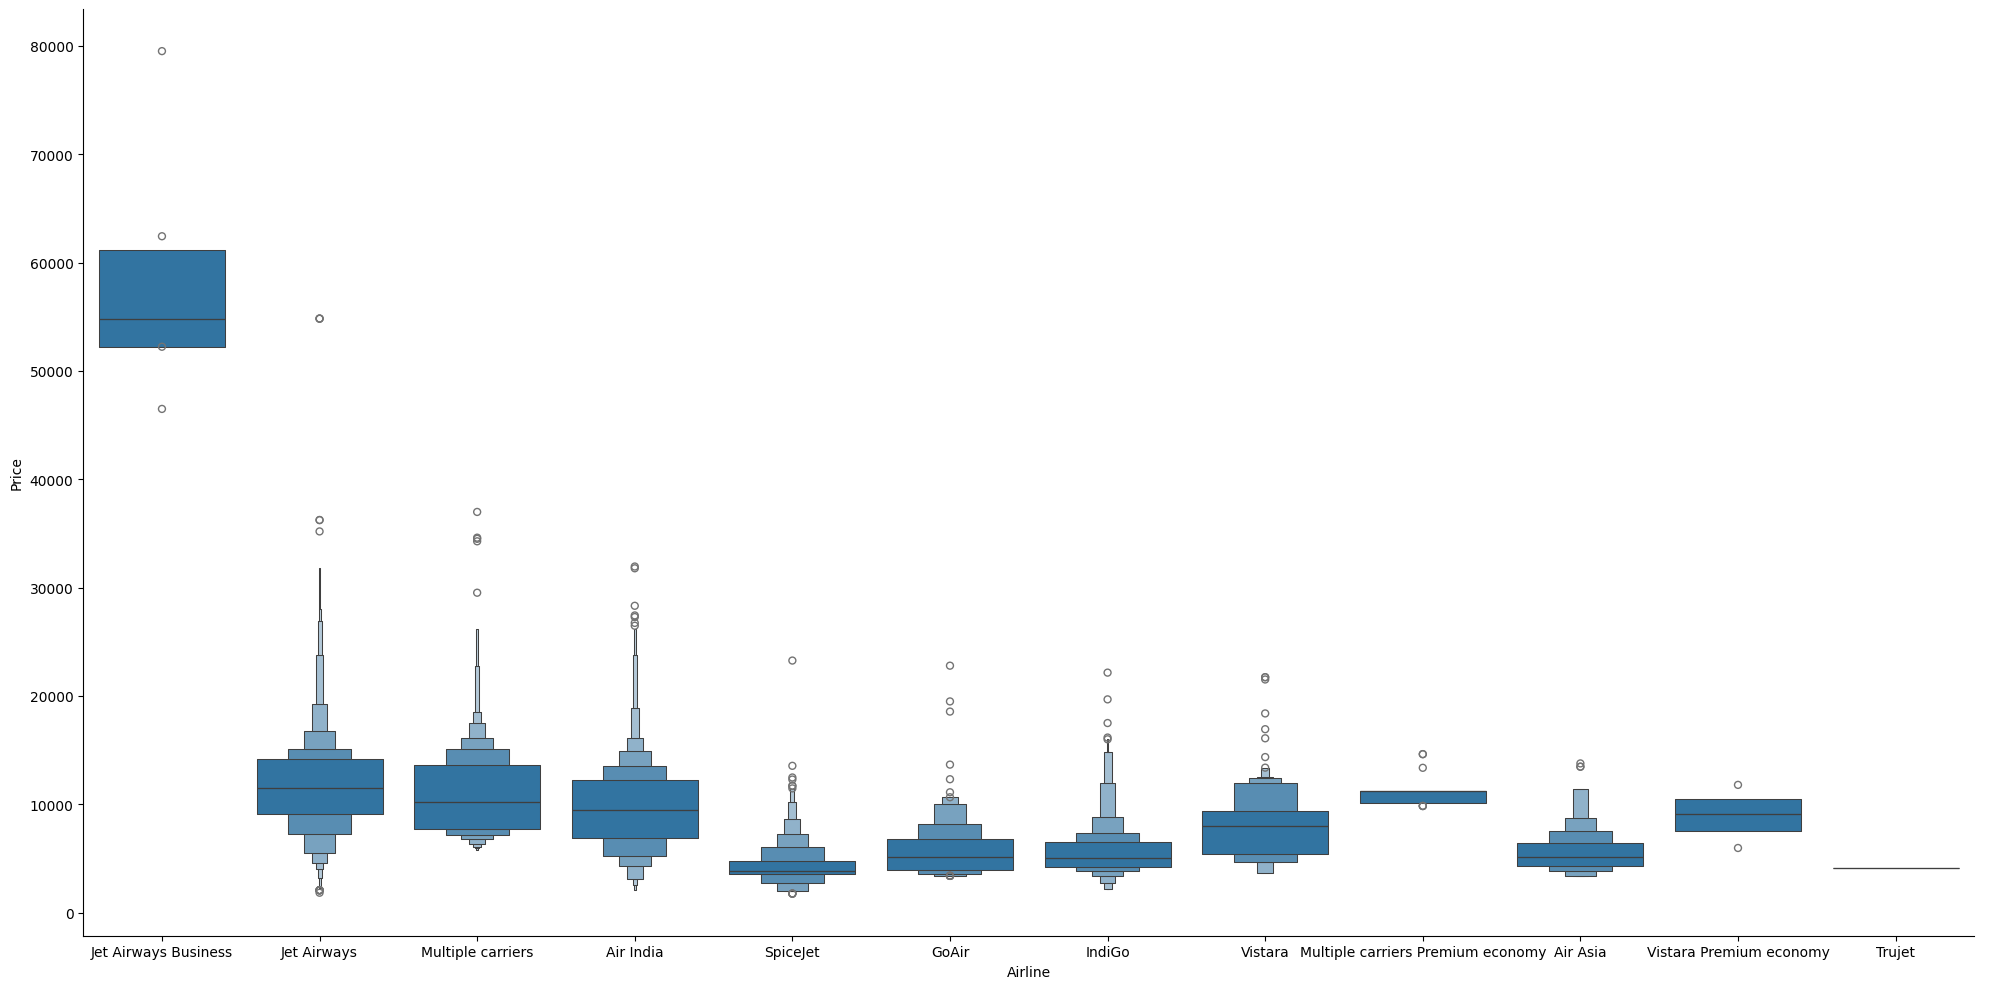

In [40]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 10, aspect = 2)
plt.show()

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000')])

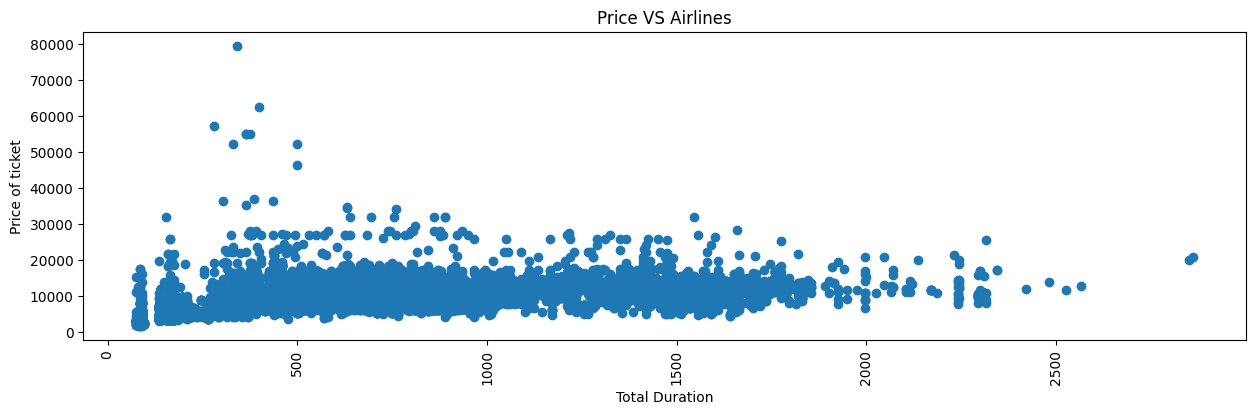

In [41]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Total_Duration'], df['Price'])
plt.xticks
plt.xlabel('Total Duration')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

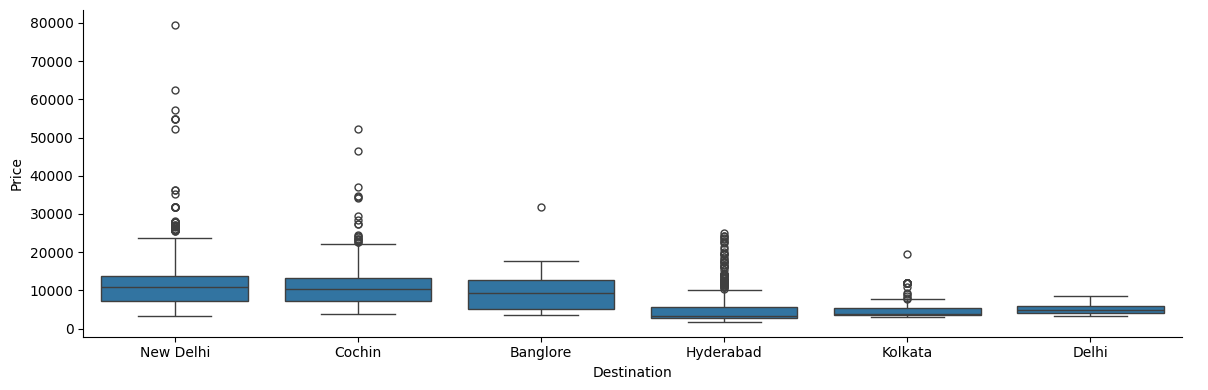

In [42]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

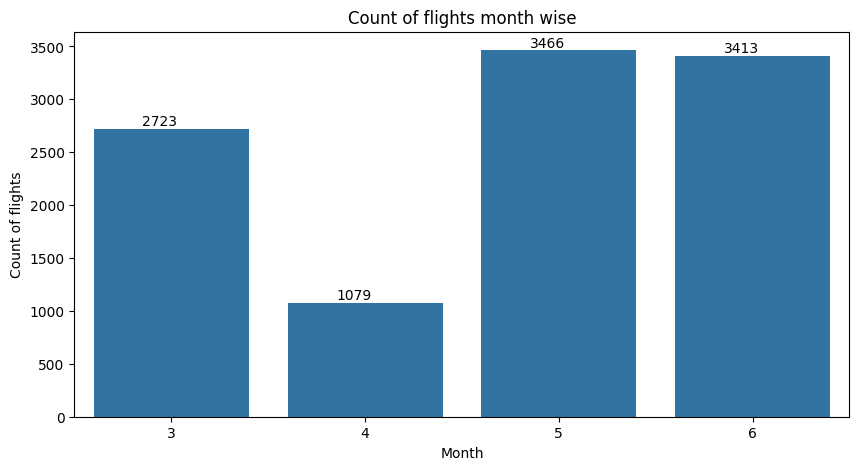

In [43]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

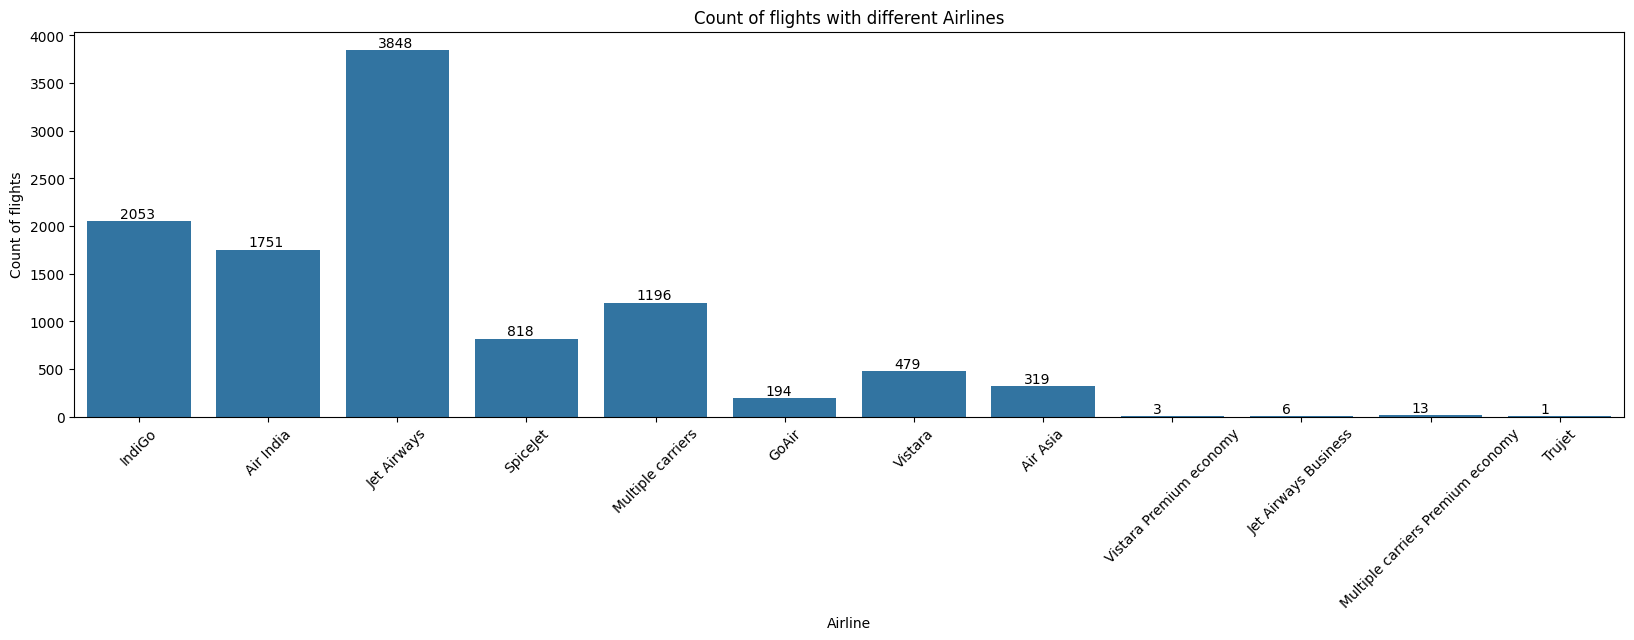

In [44]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [45]:
labelEncoder=LabelEncoder()

# converting the Airline, Source, Destination, Additional_Info into numerical data
df['Airline'] = labelEncoder.fit_transform(df['Airline'])
df['Source'] = labelEncoder.fit_transform(df['Source'])
df['Destination'] = labelEncoder.fit_transform(df['Destination'])
df['Additional_Info'] = labelEncoder.fit_transform(df['Additional_Info'])

In [46]:
df.Total_Stops.isnull().sum()

1

In [47]:
# filling the null values with the mode value
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [48]:
df.Total_Stops.isnull().sum()

0

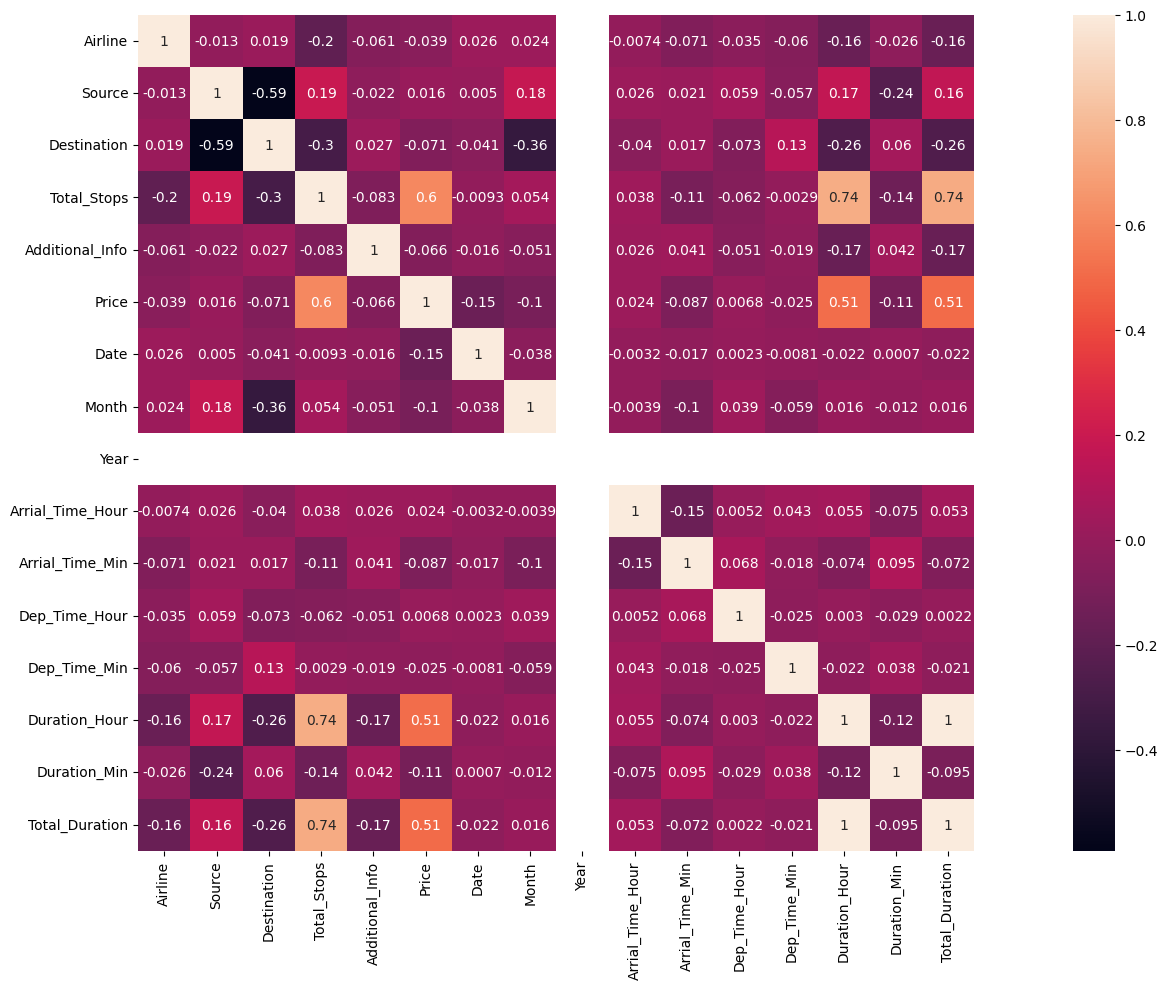

In [49]:
# correlation matrix
f, ax = plt.subplots(figsize=(20,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmax = 1, square=True, annot=True)
f.tight_layout()

In [50]:
# as we do not see any impact on the column 'Year' dropping it
df.drop('Year',axis=1,inplace=True)
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrial_Time_Hour,Arrial_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Min,Total_Duration
0,3,0,5,0.0,8,3897,24,3,1,10,22,20,120,50,170
1,1,3,0,2.0,8,7662,1,5,13,15,5,50,420,25,445
2,4,2,1,2.0,8,13882,9,6,4,25,9,25,1140,30,1170
3,3,3,0,1.0,8,6218,12,5,23,30,18,5,300,25,325
4,3,0,5,1.0,8,13302,1,3,21,35,16,50,240,45,285


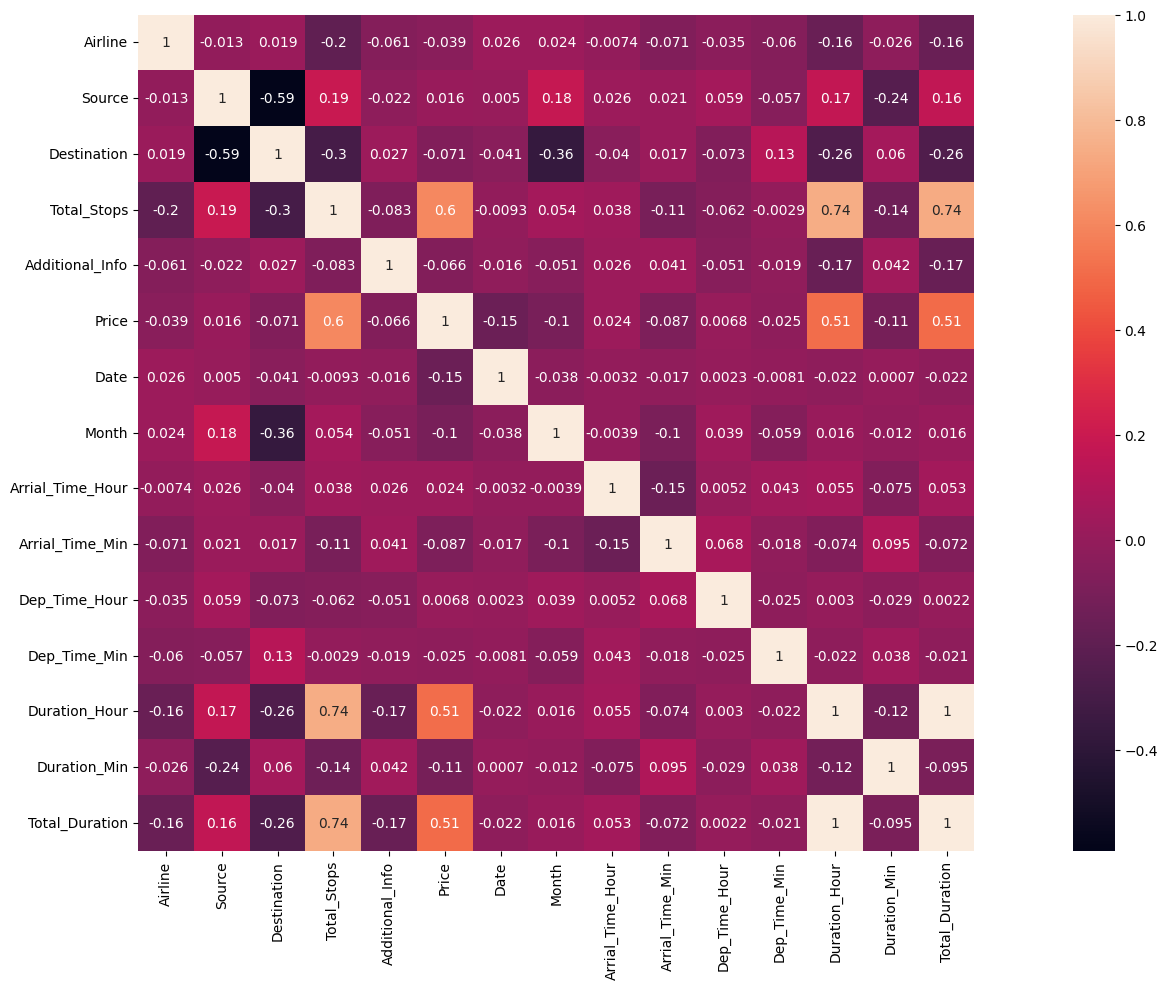

In [51]:
# correlation matrix after removing the column, 'Year'
f, ax = plt.subplots(figsize=(20,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, vmax = 1, square=True, annot=True)
f.tight_layout()

In [52]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Arrial_Time_Hour', 'Arrial_Time_Min',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Duration_Hour', 'Duration_Min',
       'Total_Duration'],
      dtype='object')

In [53]:
from scipy import stats

attributes = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Arrial_Time_Hour', 'Arrial_Time_Min',
       'Dep_Time_Hour', 'Dep_Time_Min', 'Duration_Hour', 'Duration_Min',
       'Total_Duration']

for i in attributes:
    #print(df[i], df["Price"])
    if i not in ["Price"]:
        correlation = stats.pointbiserialr(df[i], df["Price"])
    print(f"Correlation of {i} to price is {correlation}")

Correlation of Airline to price is SignificanceResult(statistic=-0.03932108067172952, pvalue=4.805559511080749e-05)
Correlation of Source to price is SignificanceResult(statistic=0.015708538587422237, pvalue=0.10451018374642568)
Correlation of Destination to price is SignificanceResult(statistic=-0.0712817518883844, pvalue=1.638364741598508e-13)
Correlation of Total_Stops to price is SignificanceResult(statistic=0.6037281986515356, pvalue=0.0)
Correlation of Additional_Info to price is SignificanceResult(statistic=-0.06561792242717279, pvalue=1.1364817742924907e-11)
Correlation of Price to price is SignificanceResult(statistic=-0.06561792242717279, pvalue=1.1364817742924907e-11)
Correlation of Date to price is SignificanceResult(statistic=-0.1536097212774481, pvalue=2.1217207045615075e-57)
Correlation of Month to price is SignificanceResult(statistic=-0.10353564002889556, pvalue=7.529989468639619e-27)
Correlation of Arrial_Time_Hour to price is SignificanceResult(statistic=0.0242207282

In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
y = df['Price']
X = df.drop(['Price'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [55]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [56]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Arrial_Time_Hour,Arrial_Time_Min,Dep_Time_Hour,Dep_Time_Min,Duration_Hour,Duration_Min,Total_Duration
0,3,0,5,0.0,8,3897,24,3,1,10,22,20,120,50,170
1,1,3,0,2.0,8,7662,1,5,13,15,5,50,420,25,445
2,4,2,1,2.0,8,13882,9,6,4,25,9,25,1140,30,1170
3,3,3,0,1.0,8,6218,12,5,23,30,18,5,300,25,325
4,3,0,5,1.0,8,13302,1,3,21,35,16,50,240,45,285


In [57]:
# Function with returns the mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
# splitting the dataset into train and test data in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [59]:
print("Shape of the Training set", X_train.shape)
print("Shape of the Training set", y_train.shape)
print("Shape of the Testing set", X_test.shape)
print("Shape of the Testing set", y_test.shape)

Shape of the Training set (7476, 14)
Shape of the Training set (7476,)
Shape of the Testing set (3205, 14)
Shape of the Testing set (3205,)


Lasso Regression Testing

In [60]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [61]:
# Predicting train and test results
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [62]:
print("Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Results for Lasso Regressor Model:
Root Mean Squared Error:  3484.344890789243
Mean Absolute % Error:  31
R-Squared:  0.42697699810912504


In [63]:
# Performing GridSearchCV on Decision Tree Regression
param_grid = dict(max_depth = list(range(3,20)))
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19]})

In [64]:
# Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [65]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  890.3433758694077
Mean Absolute % Error:  6
R-Squared:  0.9625850777698644


In [66]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  1993.3697249513161
Mean Absolute % Error:  10
R-Squared:  0.8144812168197199


Decision Tree Classifier

In [67]:
dtc = DecisionTreeClassifier(random_state= 1)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [68]:
print("Test Results for Decision Tree Classifier Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_pred)))
print("R-Squared: ", r2_score(y_test, y_pred))

Test Results for Decision Tree Classifier Model:
Root Mean Squared Error:  2259.517890606737
Mean Absolute % Error:  9
R-Squared:  0.7616343121693631


Random Forest

In [70]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tune n_estimators and other parameters
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
y_pred_rf = rf.predict(X_test)
mse_rf = mse(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [72]:
print("Test Results for Random Forest Model:")
print("Root Mean Squared Error: ", mse_rf)
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_pred)))
print("R-Squared: ", r2_rf)

Test Results for Random Forest Model:
Root Mean Squared Error:  3036046.3569889395
Mean Absolute % Error:  9
R-Squared:  0.8582508153035904
